<a href="https://colab.research.google.com/github/prosenjitmitra-we/DRDO-OP-SINDOOR/blob/main/ISRO_SATELLITE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Satellite Internet Outage Detection Using Machine Learning

[[243   3]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       246
           1       0.00      0.00      0.00        54

    accuracy                           0.81       300
   macro avg       0.41      0.49      0.45       300
weighted avg       0.67      0.81      0.73       300



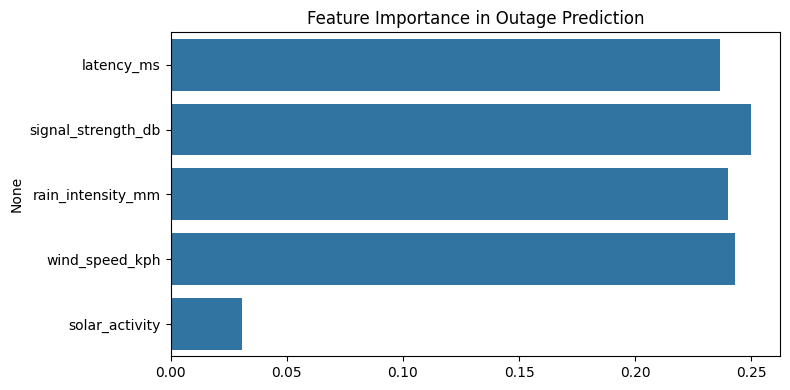

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Simulate sample data (or use real telemetry)
np.random.seed(42)
size = 1000
data = pd.DataFrame({
    'latency_ms': np.random.normal(40, 10, size),
    'signal_strength_db': np.random.normal(-50, 5, size),
    'rain_intensity_mm': np.random.uniform(0, 10, size),
    'wind_speed_kph': np.random.uniform(0, 30, size),
    'solar_activity': np.random.choice([0, 1], size=size),  # 0: low, 1: high
    'outage': np.random.choice([0, 1], size=size, p=[0.85, 0.15])  # Mostly no outage
})

# Step 3: Train/Test split
X = data.drop('outage', axis=1)
y = data['outage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train ML model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 6: Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 4))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importance in Outage Prediction")
plt.tight_layout()
plt.show()

 Dynamic Beam Handoff Simulation for LEO Satellites

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.5/234.5 kB 8.2 MB/s eta 0:00:00


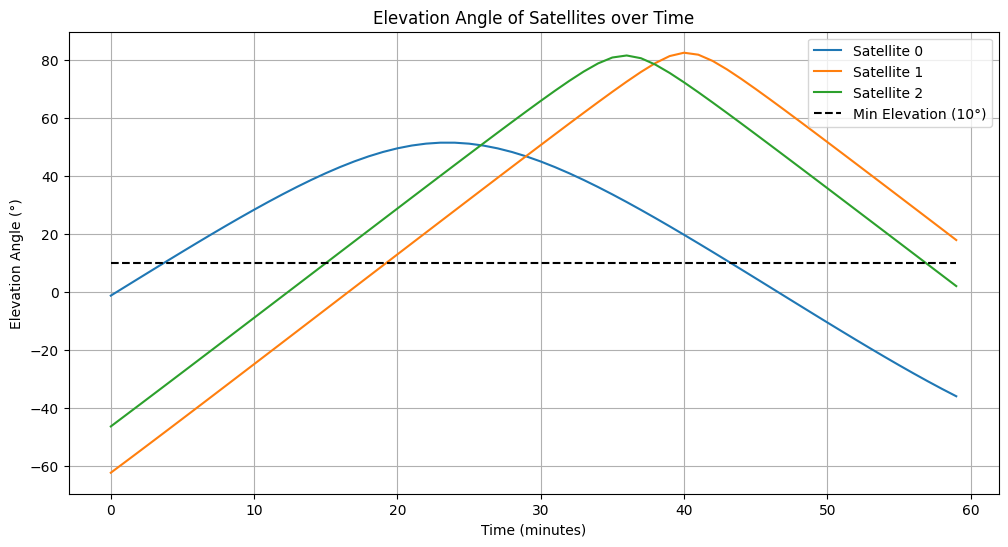

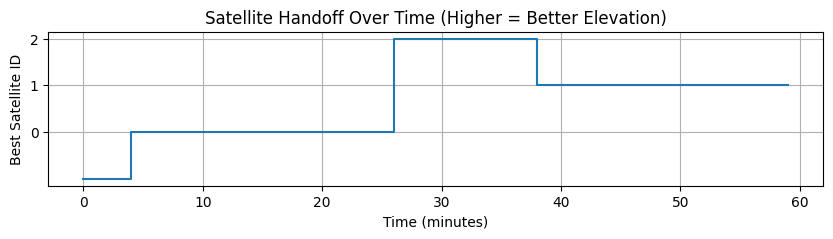

In [ ]:
# Step 1: Install necessary package for orbital simulation
!pip install sgp4

# Step 2: Import libraries
from sgp4.api import Satrec, jday
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

# Step 3: Define a ground station (e.g., in New Delhi, India)
ground_lat, ground_lon = 28.6139, 77.2090  # New Delhi

# Step 4: Simulate 3 satellites using sample TLEs (Two Line Elements)
sats = [
    Satrec.twoline2rv(
        "1 25544U 98067A   20129.54791435  .00001264  00000-0  29621-4 0  9993",
        "2 25544  51.6434 129.1634 0004903  91.7564  16.7434 15.49183226226407"
    ),
    Satrec.twoline2rv(
        "1 43205U 18015F   20129.41028538  .00000209  00000-0  82853-5 0  9990",
        "2 43205  97.3703 133.0876 0012426 124.9977 235.2373 15.24617282116891"
    ),
    Satrec.twoline2rv(
        "1 39444U 13066Z   20129.41512255  .00000562  00000-0  28323-4 0  9995",
        "2 39444  98.3320 204.0021 0014535 359.7606  92.7791 15.19104733155847"
    )
]

# Step 5: Simulate for next 60 minutes
start_time = datetime.utcnow()
time_steps = [start_time + timedelta(minutes=i) for i in range(60)]

# Step 6: Calculate elevation angles
def elevation_angle(sat, time):
    jd, fr = jday(time.year, time.month, time.day, time.hour, time.minute, time.second)
    e, r, v = sat.sgp4(jd, fr)
    if e != 0:
        return -1  # Propagation error
    # Approximate method: use z-component for elevation angle
    sat_alt_km = np.linalg.norm(r)
    elev_angle = np.arcsin(r[2] / sat_alt_km) * 180 / np.pi
    return elev_angle

# Step 7: Track best satellite based on elevation angle
best_sat_over_time = []
elevation_log = {i: [] for i in range(len(sats))}

for t in time_steps:
    elevs = []
    for i, sat in enumerate(sats):
        elev = elevation_angle(sat, t)
        elevation_log[i].append(elev)
        elevs.append(elev)
    # Select satellite with highest elevation (above 10° minimum)
    best = np.argmax(elevs) if max(elevs) > 10 else -1
    best_sat_over_time.append(best)

# Step 8: Plot satellite handoff
plt.figure(figsize=(12, 6))
for i in range(len(sats)):
    plt.plot(range(60), elevation_log[i], label=f"Satellite {i}")

plt.plot(range(60), [10]*60, 'k--', label='Min Elevation (10°)')
plt.title("Elevation Angle of Satellites over Time")
plt.xlabel("Time (minutes)")
plt.ylabel("Elevation Angle (°)")
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Plot handoff events
plt.figure(figsize=(10, 2))
plt.plot(best_sat_over_time, drawstyle='steps-post')
plt.title("Satellite Handoff Over Time (Higher = Better Elevation)")
plt.xlabel("Time (minutes)")
plt.ylabel("Best Satellite ID")
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()
